In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

In [3]:
v_rest = -70  # mV
e_ext = 0  # V
v_thr = -54  # mV
g_max = 0.2
tau_m = 20  # ms
tau_ex = 5  # ms

n = 16
N_layer = n ** 2
S = (n, n)
# S = (256, 1)
grid = np.asarray(S)

s_max = 16
sigma_form_forward = 2.5
sigma_form_lateral = 1
p_form_lateral = 1
p_form_forward = 0.16
p_elim_dep = 0.0245
p_elim_pot = 1.36 * np.e ** -4
f_rew = 10 ** 4  # Hz

# Inputs
f_mean = 20  # Hz
f_base = 5  # Hz
f_peak = 152.8  # Hz
sigma_stim = 2  # 2
t_stim = 20 # 20  # ms

# STDP
a_plus = 0.1
b = 1.2
tau_plus = 20.  # ms
tau_minus = 64.  # ms
a_minus = (a_plus * tau_plus * b) / tau_minus


In [4]:
manhattan_distances = np.ones(grid**2) * np.nan
euclidian_distances = np.ones(grid**2) * np.nan

In [5]:
for row in range(N_layer):
    for column in range(N_layer):
        manhattan_distances[row, column] = distance((row//n, row%n), (column//n, column%n), grid=grid, type='manhattan')
        euclidian_distances[row, column] = distance((row//n, row%n), (column//n, column%n), grid=grid, type='euclidian')

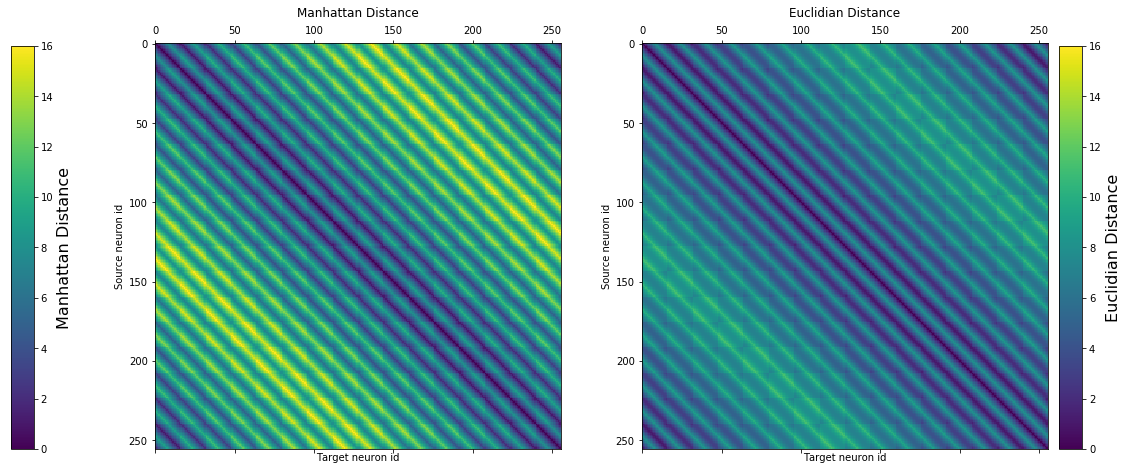

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
    
i1 =source_ax = ax1.matshow(manhattan_distances, vmin=0, vmax=np.max(manhattan_distances))
i =target_ax = ax2.matshow(euclidian_distances, vmin=0, vmax=np.max(manhattan_distances))

ax1.set_title("Manhattan Distance")
ax1.set_ylabel("Source neuron id")
ax1.set_xlabel("Target neuron id")
ax2.set_title("Euclidian Distance")
ax2.set_ylabel("Source neuron id")
ax2.set_xlabel("Target neuron id")
cbar_ax = fig.add_axes([.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(i, cax=cbar_ax)
cbar.set_label("Euclidian Distance", fontsize=16)

cbar_ax2 = fig.add_axes([0.0, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(i1, cax=cbar_ax2)
cbar2.set_label("Manhattan Distance", fontsize=16)

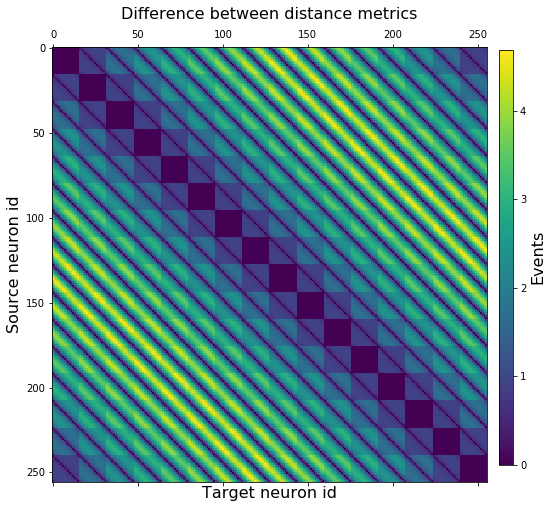

In [7]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(manhattan_distances - euclidian_distances)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics", fontsize=16)
ax1.set_ylabel("Source neuron id", fontsize=16)
ax1.set_xlabel("Target neuron id", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [8]:
results_manhattan = p_form_forward * (np.e**(-(manhattan_distances**2)/(2*(sigma_form_forward**2))))
results_euclidian = p_form_forward * (np.e**(-(euclidian_distances**2)/(2*(sigma_form_forward**2))))

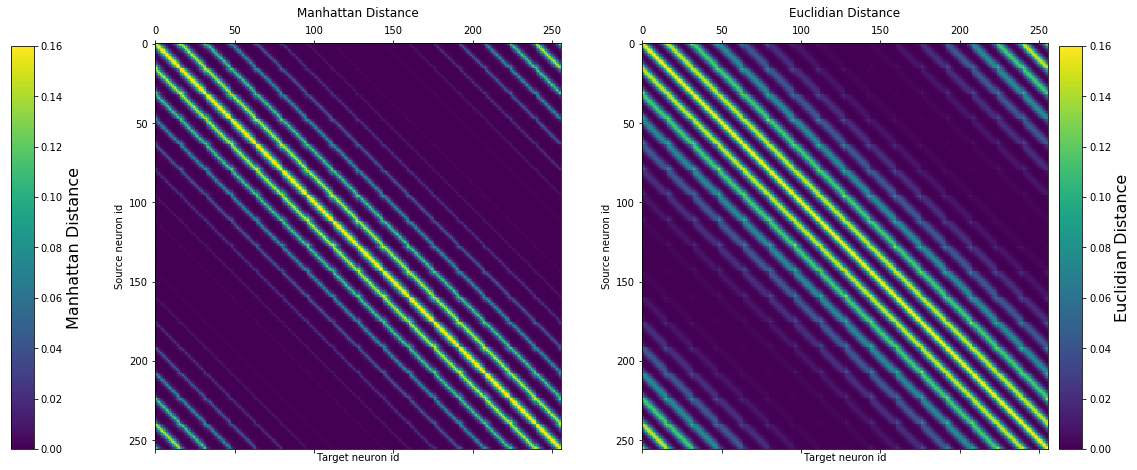

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
    
i1 =source_ax = ax1.matshow(results_manhattan, vmin=0, vmax=np.max(results_manhattan))
i =target_ax = ax2.matshow(results_euclidian, vmin=0, vmax=np.max(results_manhattan))

ax1.set_title("Manhattan Distance")
ax1.set_ylabel("Source neuron id")
ax1.set_xlabel("Target neuron id")
ax2.set_title("Euclidian Distance")
ax2.set_ylabel("Source neuron id")
ax2.set_xlabel("Target neuron id")
cbar_ax = fig.add_axes([.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(i, cax=cbar_ax)
cbar.set_label("Euclidian Distance", fontsize=16)

cbar_ax2 = fig.add_axes([0.0, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(i1, cax=cbar_ax2)
cbar2.set_label("Manhattan Distance", fontsize=16)

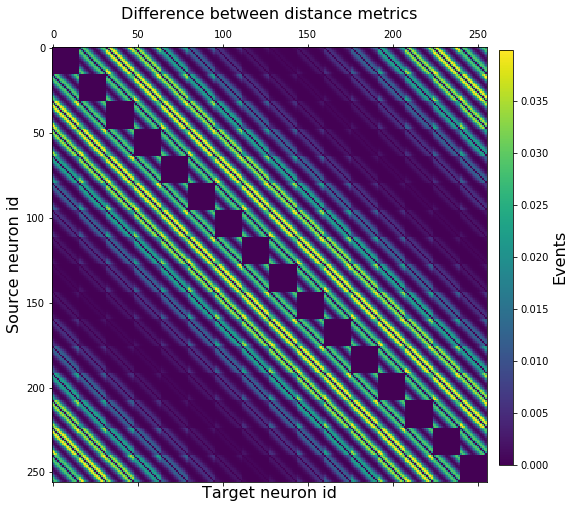

In [10]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(results_euclidian - results_manhattan)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics", fontsize=16)
ax1.set_ylabel("Source neuron id", fontsize=16)
ax1.set_xlabel("Target neuron id", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

In [11]:
c = results_manhattan[0, :]
section_manhattan = np.sort(c)[::-1]
section_d_manhattan = np.sort(manhattan_distances[0,:])
section_euclidian = np.sort(results_euclidian[0,:])[::-1]
section_d_euclidian= np.sort(euclidian_distances[0,:])

(0.0, 16.0)

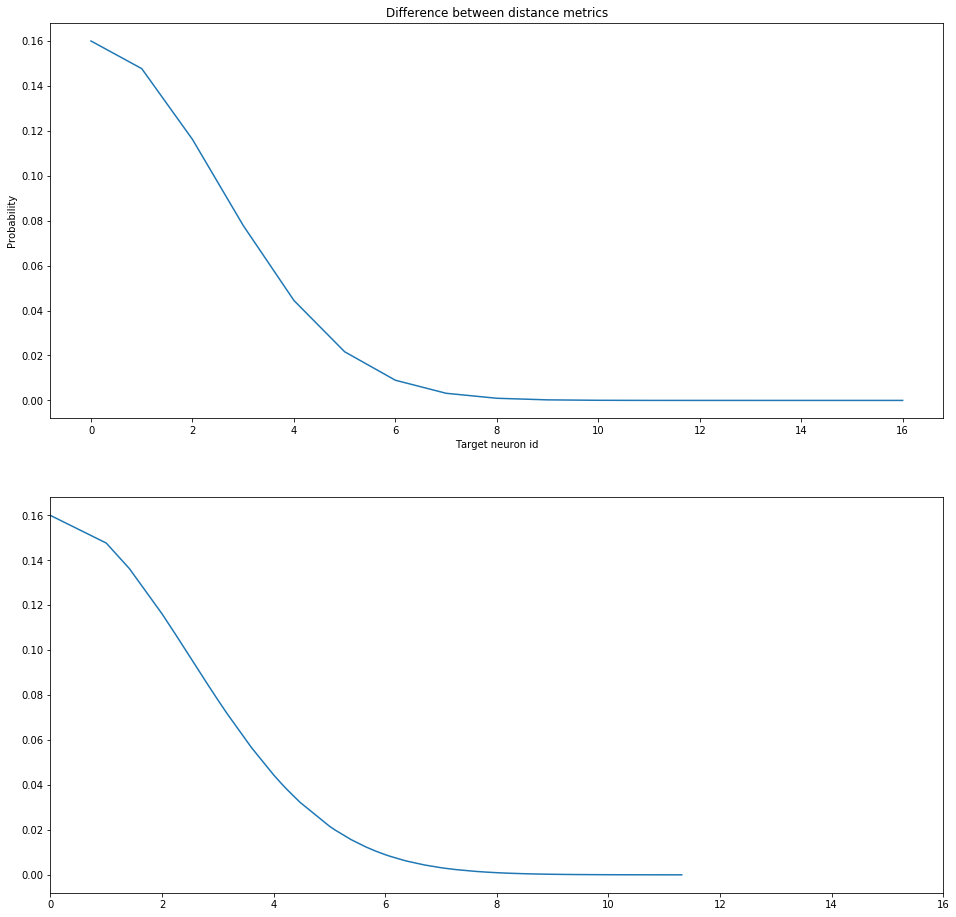

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1 ,figsize=(16, 16))
i = ax1.plot(section_d_manhattan, section_manhattan)
ax2.plot(section_d_euclidian, section_euclidian)
ax1.grid(visible=False)
ax1.set_title("Difference between distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target neuron id")

ax2.set_xlim([np.min(section_d_manhattan), np.max(section_d_manhattan)])

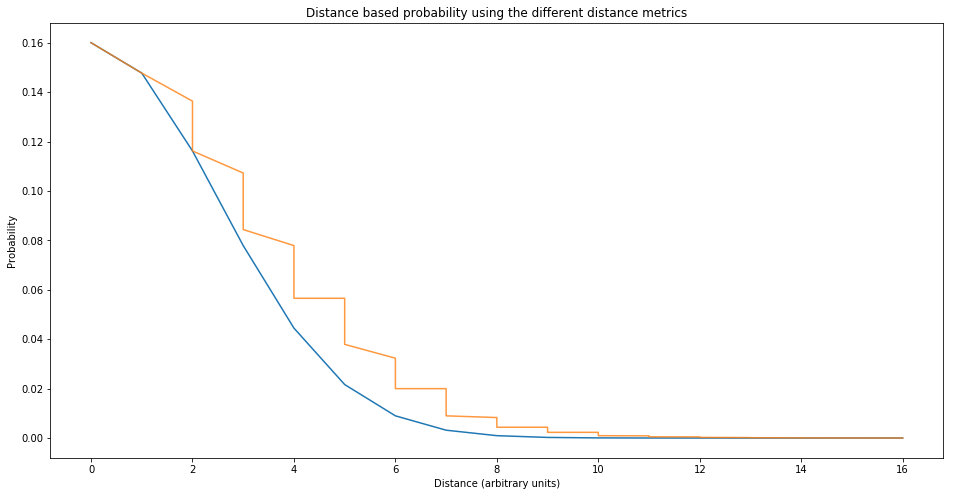

In [16]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(section_d_manhattan, section_manhattan)
ax1.plot(section_d_manhattan, section_euclidian, alpha=.8)
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

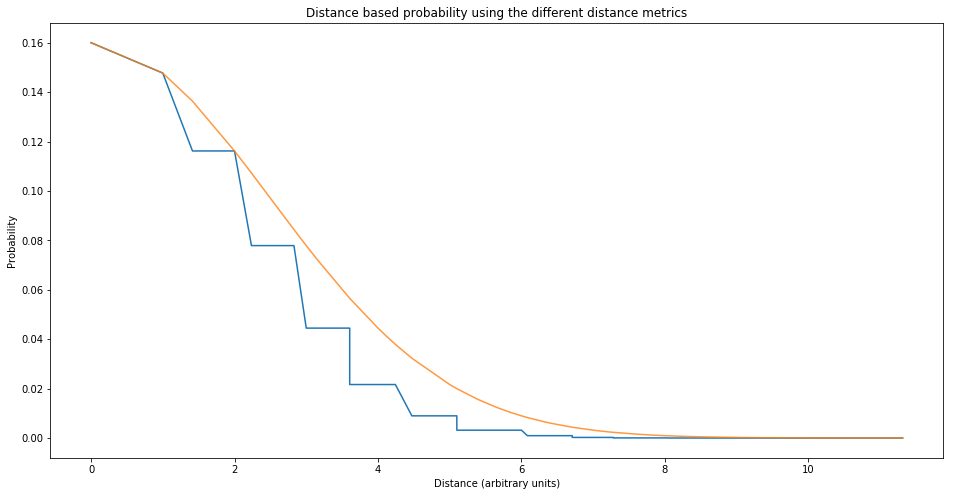

In [19]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(section_d_euclidian, section_manhattan[:section_d_euclidian.size])
ax1.plot(section_d_euclidian, section_euclidian, alpha=.8)
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

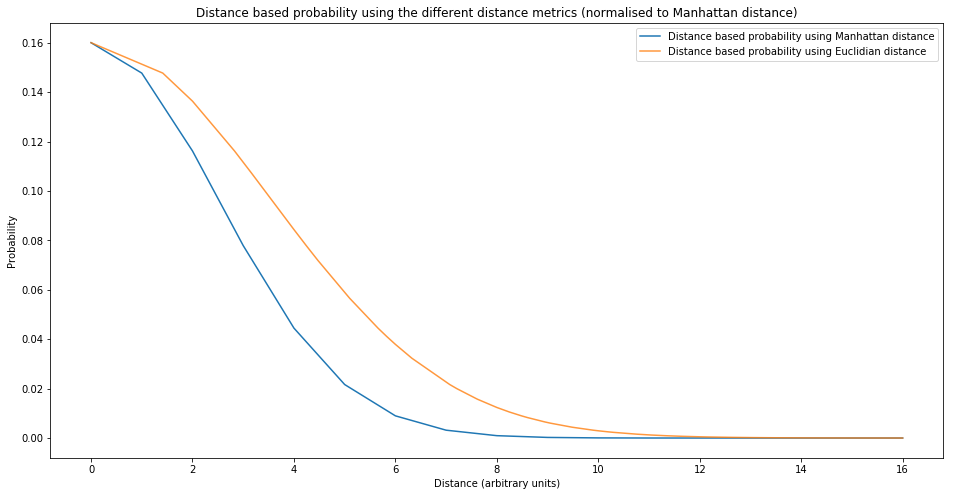

In [36]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(section_d_manhattan, section_manhattan[:section_d_euclidian.size], label="Distance based probability using Manhattan distance")
ax1.plot(section_d_euclidian * (np.max(section_d_manhattan)/np.max(section_d_euclidian)), section_euclidian, alpha=.8, label="Distance based probability using Euclidian distance")
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics (normalised to Manhattan distance)")
ax1.legend(loc='best')
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

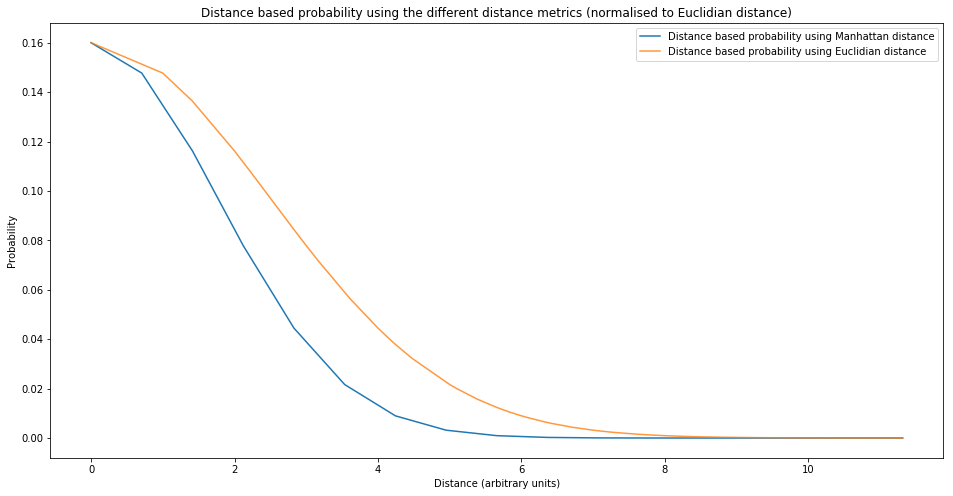

In [38]:
# Does it work the other way around?
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(section_d_manhattan* (np.max(section_d_euclidian)/np.max(section_d_manhattan)), section_manhattan[:section_d_euclidian.size], label="Distance based probability using Manhattan distance")
ax1.plot(section_d_euclidian , section_euclidian, alpha=.8, label="Distance based probability using Euclidian distance")
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics (normalised to Euclidian distance)")
ax1.legend(loc='best')
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

In [14]:
import scipy.stats as stats

In [15]:
stats.wilcoxon(section_euclidian[:section_euclidian.size], section_manhattan[:section_euclidian.size])

WilcoxonResult(statistic=0.0, pvalue=2.8071795113002207e-42)

In [20]:
manhattan_distances
euclidian_distances

array([[ 0.        ,  1.        ,  2.        , ...,  3.16227766,
         2.23606798,  1.41421356],
       [ 1.        ,  0.        ,  1.        , ...,  4.12310563,
         3.16227766,  2.23606798],
       [ 2.        ,  1.        ,  0.        , ...,  5.09901951,
         4.12310563,  3.16227766],
       ..., 
       [ 3.16227766,  4.12310563,  5.09901951, ...,  0.        ,
         1.        ,  2.        ],
       [ 2.23606798,  3.16227766,  4.12310563, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.41421356,  2.23606798,  3.16227766, ...,  2.        ,
         1.        ,  0.        ]])

In [21]:
squared_euclidian_distances = euclidian_distances**2

In [22]:
squared_euclidian_distances

array([[  0.,   1.,   4., ...,  10.,   5.,   2.],
       [  1.,   0.,   1., ...,  17.,  10.,   5.],
       [  4.,   1.,   0., ...,  26.,  17.,  10.],
       ..., 
       [ 10.,  17.,  26., ...,   0.,   1.,   4.],
       [  5.,  10.,  17., ...,   1.,   0.,   1.],
       [  2.,   5.,  10., ...,   4.,   1.,   0.]])

In [24]:
largest_squared_distance = np.max(squared_euclidian_distances)
print largest_squared_distance

128.0


In [31]:
squared_distances = np.arange(largest_squared_distance)
print squared_distances.shape

(129,)


In [27]:
LUT = np.zeros(squared_distances.shape)
for index in range(LUT.size):
    LUT[index] = p_form_forward * (np.e**(-(squared_distances[index])/(2*(sigma_form_forward**2))))

In [29]:
print LUT.shape

(129,)


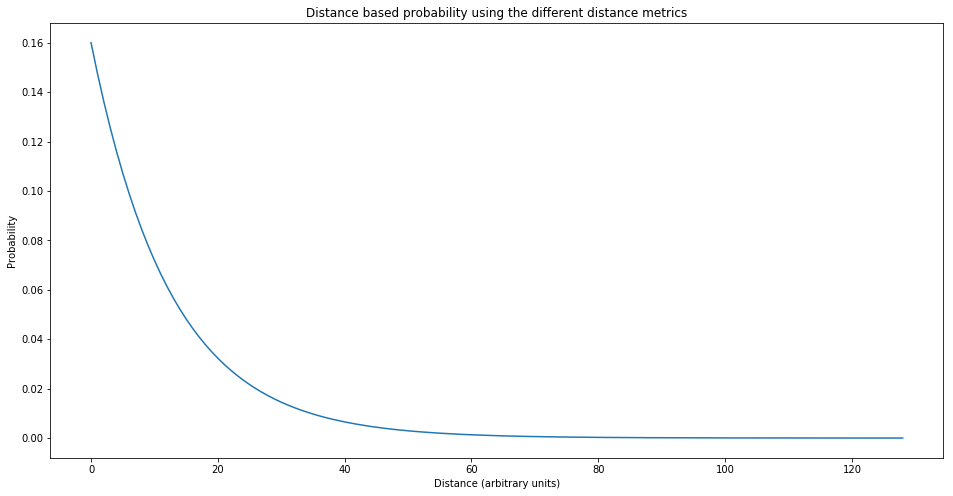

In [32]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(squared_distances, LUT)
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

In [39]:
LUT2 = p_form_forward * (np.e**(-(squared_distances)/(2*(sigma_form_forward**2))))

In [40]:
LUT - LUT2

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [49]:
small_grid = np.array([7,7])
small_test = np.ones(np.array(small_grid)**2) * np.nan
small_n = 7
small_N = small_n ** 2
print small_grid
print small_test.shape
print small_n
print small_N
for row in range(small_N):
    for column in range(small_N):
        small_test[row, column] = distance((row//small_n, row%small_n), (column//small_n, column%small_n), grid=small_grid, type='euclidian')

[7 7]
(49, 49)
7
49


In [50]:
np.max(small_test)

4.2426406871192848

In [51]:
np.max(small_test**2)

17.999999999999996

In [52]:
small_largest_square = np.max(small_test**2)
small_squared_distances = np.arange(small_largest_square)

In [53]:
small_LUT = p_form_forward * (np.e**(-(small_squared_distances)/(2*(sigma_form_forward**2))))

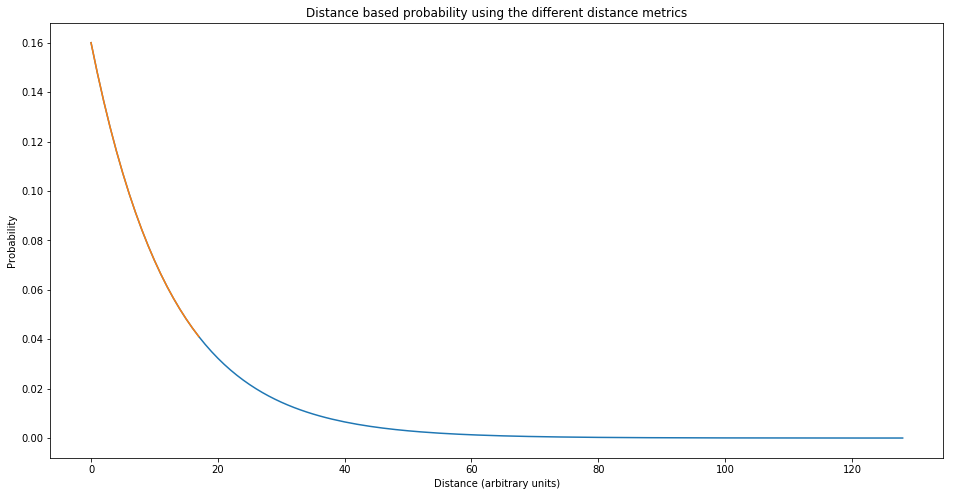

In [56]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(squared_distances, LUT)
i = ax1.plot(small_squared_distances, small_LUT)
ax1.grid(visible=False)
ax1.set_title("Distance based probability using the different distance metrics")
ax1.set_ylabel("Probability")
ax1.set_xlabel("Distance (arbitrary units)")

In [58]:
quantised_lut = LUT2 * (2**16 -1 )

In [82]:
np.count_nonzero(quantised_lut > 0)

129

In [63]:
lat_LUT = p_form_lateral * (np.e**(-(squared_distances)/(2*(sigma_form_lateral**2))))

In [65]:
quantised_lat_lut = lat_LUT * (2**16 -1 )

In [81]:
np.count_nonzero(quantised_lat_lut > 0)

129

In [76]:
quantised_lat_lut[quantised_lat_lut >= .5]

array([  6.55350000e+04,   3.97489868e+04,   2.41089792e+04,
         1.46228350e+04,   8.86919779e+03,   5.37944038e+03,
         3.26279553e+03,   1.97898552e+03,   1.20031539e+03,
         7.28028088e+02,   4.41571357e+02,   2.67826566e+02,
         1.62445024e+02,   9.85278875e+01,   5.97601846e+01,
         3.62463842e+01,   2.19845433e+01,   1.33342996e+01,
         8.08766151e+00,   4.90541467e+00,   2.97528440e+00,
         1.80460121e+00,   1.09454596e+00,   6.63875684e-01])